# Practice Project/ Case Study 01 - BigMart Sales from AV

#### Problem statement - The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales. 

#### We will explore the problem in following stages:

##### Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
##### Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
##### Data Cleaning – imputing missing values in the data and checking for outliers
##### Feature Engineering – modifying existing variables and creating new ones for analysis
##### Model Building – making predictive models on the data

### 1. Hypothesis Generation - very pivotal step in the process of analyzing data

In [1]:
#This is done BEFORE looking at the data

In [1]:
#Store Level Hypotheses:

#City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
#Population Density: Stores located in densely populated areas should have higher sales because of more demand.
#Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
#Competitors: Stores having similar establishments nearby should have less sales because of more competition.
#Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
#Location: Stores located within popular marketplaces should have higher sales because of better access to customers.
#Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.
#Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

#Product Level Hypotheses:

#Brand: Branded products should have higher sales because of higher trust in the customer.
#Packaging: Products with good packaging can attract customers and sell more.
#Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.
#Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
#Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
#Advertising: Better advertising of products in the store will should higher sales in most cases.
#Promotional Offers: Products accompanied with attractive offers and discounts will sell more.

### 2. Data Exploration

In [2]:
import pandas as pd
import numpy as np

#Read files:
train = pd.read_csv("TrainSales.csv")
test = pd.read_csv("TestSales.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# combine train and test data for feature re-engineering and cleaning, we'll separate it later
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test],ignore_index=True) # bedefault axis = 0, so will concatenate rowwise
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


/home/mkadam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [5]:
#Thus we can see that data has same #columns but rows equivalent to both test and train. 
#One of the key challenges in any data set is missing values. 
#Lets start by checking which columns contain missing values.

In [6]:
data.isnull().sum()
# or data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [7]:
# Lets describe
data.describe(include='all')

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
count,14204,14204,14204.000000,8523.000000,14204,14204.000000,11765.000000,14204.000000,14204,14204,10188,14204,14204
unique,5,1559,NaN,NaN,16,NaN,NaN,NaN,10,3,3,4,2
top,Low Fat,NCH55,NaN,NaN,Fruits and Vegetables,NaN,NaN,NaN,OUT027,Tier 3,Medium,Supermarket Type1,train
freq,8485,10,NaN,NaN,2013,NaN,NaN,NaN,1559,5583,4655,9294,8523
mean,NaN,NaN,141.004977,2181.288914,NaN,0.065953,12.792854,1997.830681,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,62.086938,1706.499616,NaN,0.051459,4.652502,8.371664,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,31.290000,33.290000,NaN,0.000000,4.555000,1985.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,94.012000,834.247400,NaN,0.027036,8.710000,1987.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,142.247000,1794.331000,NaN,0.054021,12.600000,1999.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,185.855600,3101.296400,NaN,0.094037,16.750000,2004.000000,NaN,NaN,NaN,NaN,NaN


In [8]:
#Some observations:

# Item_Visibility has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.
# Outlet_Establishment_Years vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.
# The lower ‘count’ of Item_Weight and Item_Outlet_Sales confirms the findings from the missing value check.

In [9]:
# Moving to nominal (categorical) variable, lets have a look at the number of unique values in each of them.

data.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

In [10]:
#This tells us that there are 1559 products and 10 outlets/stores (which was also mentioned in problem statement).
#Another thing that should catch attention is that Item_Type has 16 unique values. 
#Let’s explore further using the frequency of different categories in each nominal variable. 
# No need to consider IDs and source we added

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


In [12]:
#Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']

#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]

#print frequencies of categories
for col in categorical_columns:
    print('\nFrequency for categories for variable %s'%col)
    print(data[col].value_counts())


Frequency for categories for variable Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency for categories for variable Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency for categories for variable Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Frequency for categories for variable Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: 

In [13]:
#The output gives us following observations:

#Item_Fat_Content: Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘regular’.
#Item_Type: Not all categories have substantial numbers. It looks like combining them can give better results.
#Outlet_Type: Supermarket Type2 and Type3 can be combined. But we should check if that’s a good idea before doing it.

### 3. Data Cleaning

In [14]:
#This step typically involves imputing missing values and treating outliers. 
#Though outlier removal is very important in regression techniques, advanced tree based algorithms 
#are impervious to outliers.
#We’ll focus on the imputation step here, which is a very important step.

#### Imputing Missing Values

In [15]:
#Pivot_table by def aggfunc=mean
    
#Determine the average weight per item:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')

#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Item_Weight'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('Orignal #missing: %d'% sum(miss_bool))
data.loc[miss_bool,'Item_Weight'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight.at[x, 'Item_Weight'])
print ('Final #missing: %d'% sum(data['Item_Weight'].isnull()))

Orignal #missing: 2439
Final #missing: 0


In [16]:
#This confirms that the column has no missing values now. 
#Lets impute Outlet_Size with the mode of the Outlet_Size for the particular type of outlet.

In [17]:
#Import mode function:
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
print('Mode for each Outlet_Type:')
print(outlet_size_mode)

#Get a boolean variable specifying missing Outlet_Size values
miss_bool = data['Outlet_Size'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('\nOrignal #missing: %d'% sum(miss_bool))
data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print (sum(data['Outlet_Size'].isnull()))

/home/mkadam/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


Mode for each Outlet_Type:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  

Orignal #missing: 4016
0


In [18]:
#data.isnull().sum()
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
source                          0
dtype: int64

### 4. Feature Engineering

In [19]:
#Step 1: Consider combining Outlet_Type

data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


In [20]:
#This shows significant difference between them and we’ll leave them as it is. 
#Note that this is just one way of doing this, you can perform some other analysis in 
#different situations and also do the same for other features.

In [21]:
#Step 2: Modify Item_Visibility

#We noticed that the minimum value here is 0, which makes no practical sense. 
#Lets consider it like missing information and impute it with mean visibility of that product.

In [22]:
#Determine average visibility of a product
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
miss_bool = (data['Item_Visibility'] ==0)

print('Number of 0 values initially: %d'%sum(miss_bool))
data.loc[miss_bool,'Item_Visibility'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg.at[x,'Item_Visibility'])
print('Number of 0 values after modification: %d'%sum(data['Item_Visibility']==0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


In [23]:
#In step 1 we hypothesized that products with higher visibility are likely to sell more. 
#But along with comparing products on absolute terms, we should look at the visibility of the product 
#in that particular store as compared to the mean visibility of that product across all stores. 
#This will give some idea about how much importance was given to that product in a store as compared to 
#other stores. We can use the ‘visibility_avg’ variable made above to achieve this.

In [24]:
#Determine another variable with means ratio
data['Item_Visibility_MeanRatio'] = data.apply(lambda x: x['Item_Visibility']/visibility_avg.at[x['Item_Identifier'],'Item_Visibility'], axis=1)
print(data['Item_Visibility_MeanRatio'].describe())

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64


In [25]:
# Step 3: Create a broad category of Type of Item

In [26]:
#Earlier we saw that the Item_Type variable has 16 categories which might prove to be very useful in analysis. 
#So its a good idea to combine them. One way could be to manually assign a new category to each. 
#But there’s a catch here. If you look at the Item_Identifier, i.e. the unique ID of each item, 
#it starts with either FD, DR or NC. If you see the categories, these look like being Food, Drinks and Non-Consumables. 
#So I’ve used the Item_Identifier variable to create a new column

In [27]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [28]:
#Another idea could be to combine categories based on sales. 
#The ones with high average sales could be combined together. 

In [29]:
#Step 4: Determine the years of operation of a store

In [30]:
#Years: This shows stores which are 4-28 years old. Notice I’ve used 2013. Why? Read the problem statement carefully and you’ll know.
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [31]:
#Step 5: Modify categories of Item_Fat_Content

In [32]:
#Change categories of low fat:
print ('Original Categories:')
print (data['Item_Fat_Content'].value_counts())

print ('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print (data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [33]:
# In step 4 we saw there were some non-consumables as well and a fat-content should not be specified for them. 
#So we can also create a separate category for such kind of observations.

In [34]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [35]:
#Step 6: Numerical and One-Hot Coding of Categorical variables

In [36]:
#Since scikit-learn accepts only numerical variables, I converted all categories of nominal variables into 
#numeric types. Also, I wanted Outlet_Identifier as a variable as well. 
#So I created a new variable ‘Outlet’ same as Outlet_Identifier and coded that. 
#Outlet_Identifier should remain as it is, because it will be required in the submission file.

#Lets start with coding all categorical variables as numeric using ‘LabelEncoder’ from sklearn’s preprocessing module.

In [37]:
 #Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [38]:
#One-Hot-Coding refers to creating dummy variables, one for each category of a categorical variable. 
#For example, the Item_Fat_Content has 3 categories – ‘Low Fat’, ‘Regular’ and ‘Non-Edible’. 
#One hot coding will remove this variable and generate 3 new variables. 
#Each will have binary numbers – 0 (if the category is not present) and 1(if category is present). 
#This can be done using ‘get_dummies’ function of Pandas.

In [39]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [40]:
data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
O

In [41]:
#Step 7: Exporting Data

In [42]:
#Final step is to convert data back into train and test data sets. 
#Its generally a good idea to export both of these as modified data sets 
#so that they can be re-used for multiple sessions. This can be achieved using following code:

In [43]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

/home/mkadam/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### 4. Model Building

In [44]:
# Create Baseline model

In [45]:
#Mean based:
mean_sales = train['Item_Outlet_Sales'].mean()

#Define a dataframe with IDs for submission:
base1 = test[['Item_Identifier','Outlet_Identifier']]
base1['Item_Outlet_Sales'] = mean_sales

#Export submission file
base1.to_csv("baseline.csv",index=False)

/home/mkadam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
#define function - generalised approach

In [47]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn import metrics
import numpy as np
from sklearn.model_selection import cross_validate
def modelfit1(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    #Perform cross-validation:
    
    cv_score = cross_validate(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_median_absolute_error')
    print('***********************************************')
    #print(cv_score)
    print('***********************************************')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

In [48]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn.feature_selection import f_regression
from sklearn import metrics
import numpy as np
#from sklearn.model_selection import cross_validate
def modelfit(model,reg_algo_name,dtrain, dtest, predictors, target, IDcol, filename):
    """This function is written to train the Regression model(object) passed, Predict the results, Evalueate the model, Print the Evaluation Summary. 
       
        model        :model name (instantiated model/ object)
        
        reg_algo_name:(String) Name of the regression algorithm used as below
                    
           "LinearRegression"    
           "DecisionTreeRegressor"  
           "RandomForestRegressor" 
           "SVRegressor"   
           "KNNRegressor"
           
        dtrain      : train dataframe
        
        dtest       : test dataframe
        
        predictors  : list of name of selected features for modeling
        
        target      : target feature name
        
        IDCol       : identifier column names from dtrain (train_dataset)
       
        filename    : Prediction Output file 
    """
    
    #Fit the algorithm on the data
    model.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = model.predict(dtrain[predictors])
    
    #Perform Evaluation:
    r2 = model.score(dtrain[predictors],dtrain[target])
    n = train[predictors].shape[0]
    p = train[predictors].shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1) 
    
    print ("\n************** Regression Model Report **************")
    print("\nR Square                 : %.4g" % r2)
    print("Adj R Square             : %.4g" %adjusted_r2)
    print ("\nMean Absolute Error     : %.4g" % metrics.mean_absolute_error(dtrain[target].values, dtrain_predictions))
    print ("Mean Squared Error      : %.4g" % metrics.mean_squared_error(dtrain[target].values, dtrain_predictions))
    print ("Root Mean Squared Error : %.8f" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    
    if (reg_algo_name == "LinearRegression"):  
        reg_summary = pd.DataFrame(data=predictors,columns=['Features'])
        reg_summary['Coefficients'] = model.coef_
        p_values = f_regression(dtrain[predictors], dtrain[target])[1]
        reg_summary['F-stat(p-value)'] = p_values
        temp = []
        p = p_values.round(3)
        for i in p:
            if i < 0.05:
                temp ="Yes"   
            else:
                temp ="No"
        reg_summary['Significant'] = temp

        
    elif (reg_algo_name == "DecisionTreeRegressor"):  
        reg_summary = pd.DataFrame(data=predictors,columns=['Features'])
        reg_summary['Feature Importance'] = model.feature_importances_
        p_values = f_regression(dtrain[predictors], dtrain[target])[1]
        reg_summary['F-stat(p-value)'] = p_values
        temp = []
        p = p_values.round(3)
        for i in p:
            if i < 0.05:
                temp ="Yes"   
            else:
                temp ="No"
        reg_summary['Significant'] = temp
    
    
    elif (reg_algo_name == "RandomForestRegressor"):  
        reg_summary = pd.DataFrame(data=predictors,columns=['Features'])
        reg_summary['Feature Importance'] = model.feature_importances_
        p_values = f_regression(dtrain[predictors], dtrain[target])[1]
        reg_summary['F-stat(p-value)'] = p_values
        temp = []
        p = p_values.round(3)
        for i in p:
            if i < 0.05:
                temp ="Yes"   
            else:
                temp ="No"
        reg_summary['Significant'] = temp

    elif (reg_algo_name == "SVRegressor"):  
        reg_summary = pd.DataFrame(data=predictors,columns=['Features'])
        reg_summary['Coefficients'] = model.coef_[0]
        p_values = f_regression(dtrain[predictors], dtrain[target])[1]
        reg_summary['F-stat(p-value)'] = p_values
        temp = []
        p = p_values.round(3)
        for i in p:
            if i < 0.05:
                temp ="Yes"   
            else:
                temp ="No"
        reg_summary['Significant'] = temp
        #type(model.coef_)-2d array
        
    elif (reg_algo_name == "KNNRegressor"):  
        reg_summary = pd.DataFrame(data=predictors,columns=['Features'])
        #reg_summary['Coefficients'] = model.coef_[0]
        p_values = f_regression(dtrain[predictors], dtrain[target])[1]
        reg_summary['F-stat(p-value)'] = p_values
        temp = []
        p = p_values.round(3)
        for i in p:
            if i < 0.05:
                temp ="Yes"   
            else:
                temp ="No"
        reg_summary['Significant'] = temp
    
    
#    print ("\n************** Summary Report **************")
#    print(reg_summary)
    
    #Predict on testing data:
    dtest[target] = model.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

In [49]:
#Define target and ID columns:
#target = 'Item_Outlet_Sales'
#IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn import metrics
import numpy as np
from sklearn.model_selection import cross_validate, KFold
def cross_val(alg, dtrain, dtest, predictors, target):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    #Perform cross-validation:
    cv_score = cross_validate(alg, dtrain[predictors], dtrain[target], cv=10, scoring='neg_mean_squared_error')
    #print('***********************************************')
    #print(cv_score)
    print('***********************************************')
    cv_score1 = np.sqrt(np.abs(cv_score['test_score']))
    #cv_score1 = np.abs(cv_score)
    #cv_score1=np.absolute(cv_score['test_score'])
    
    #Print model report:
    print("\nModel Cross Validation Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score1), np.std(cv_score1), np.min(cv_score1), np.max(cv_score1)))
    print('***********************************************')

    #Regression	 	 scoring parameter;
#‘explained_variance’	metrics.explained_variance_score	 
#‘max_error’	metrics.max_error	 
#‘neg_mean_absolute_error’	metrics.mean_absolute_error	 
#‘neg_mean_squared_error’	metrics.mean_squared_error	 
#‘neg_mean_squared_log_error’	metrics.mean_squared_log_error	 
#‘neg_median_absolute_error’	metrics.median_absolute_error	 
#‘r2’	metrics.r2_score

    #Predict on testing data:
    #dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    #IDcol.append(target)
    #submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    #submission.to_csv(filename, index=False)

### Linear Regression Model

In [50]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

predictors = [x for x in train.columns if x not in [target]+IDcol]

# print predictors
model1 = LinearRegression(normalize=True) 

modelfit(model1, "LinearRegression",train, test, predictors, target, IDcol, 'LinearReg.csv')
cross_val(model1, train, test, predictors, target)

coef1 = pd.Series(model1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')


************** Regression Model Report **************

R Square                 : 0.5632
Adj R Square             : 0.5616

Mean Absolute Error     : 835.5
Mean Squared Error      : 1.272e+06
Root Mean Squared Error : 1127.72481714


/home/mkadam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


***********************************************

Model Cross Validation Report
RMSE : 1128
CV Score : Mean - 1130 | Std - 16.35 | Min - 1110 | Max - 1163
***********************************************



************** Regression Model Report **************

R Square                 : 0.5625
Adj R Square             : 0.5609

Mean Absolute Error     : 836
Mean Squared Error      : 1.274e+06
Root Mean Squared Error : 1128.62498174


/home/mkadam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


***********************************************

Model Cross Validation Report
RMSE : 1129
CV Score : Mean - 1131 | Std - 17.85 | Min - 1110 | Max - 1167
***********************************************


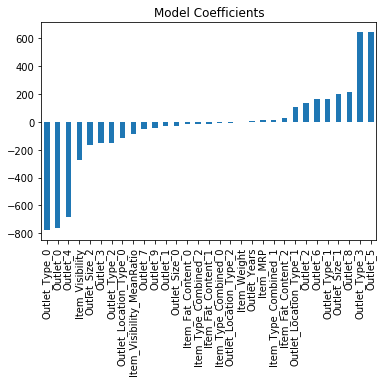

In [51]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

predictors = [x for x in train.columns if x not in [target]+IDcol]

# print predictors
model1 = Ridge(alpha=0.05,normalize=True) 

modelfit(model1, "LinearRegression",train, test, predictors, target, IDcol, 'RidgeReg.csv')
cross_val(model1, train, test, predictors, target)

coef1 = pd.Series(model1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')


************** Regression Model Report **************

R Square                 : 0.5632
Adj R Square             : 0.5616

Mean Absolute Error     : 835
Mean Squared Error      : 1.272e+06
Root Mean Squared Error : 1127.81033506


/home/mkadam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


***********************************************

Model Cross Validation Report
RMSE : 1128
CV Score : Mean - 1130 | Std - 16.98 | Min - 1109 | Max - 1164
***********************************************


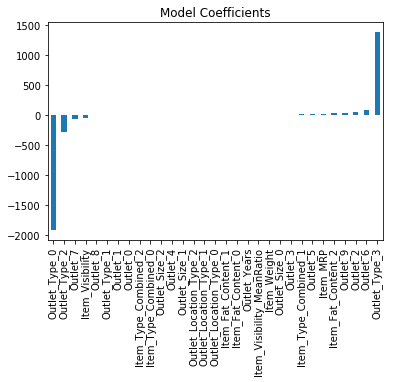

In [52]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

predictors = [x for x in train.columns if x not in [target]+IDcol]

# print predictors
model1 = Lasso(alpha=0.10,normalize=True) 

modelfit(model1, "LinearRegression",train, test, predictors, target, IDcol, 'Lasso.csv')
cross_val(model1, train, test, predictors, target)

coef1 = pd.Series(model1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')


************** Regression Model Report **************

R Square                 : 0.5632
Adj R Square             : 0.5616

Mean Absolute Error     : 835
Mean Squared Error      : 1.272e+06
Root Mean Squared Error : 1127.81033506


/home/mkadam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


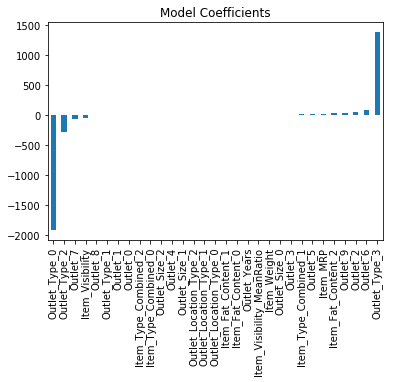

In [53]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

predictors = [x for x in train.columns if x not in [target]+IDcol]

# print predictors
model1 = ElasticNet(alpha=0.1,l1_ratio=1.0,normalize=True) 

modelfit(model1, "LinearRegression",train, test, predictors, target, IDcol, 'Elastic.csv')

coef1 = pd.Series(model1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

### Checking DTR and RFR


************** Regression Model Report **************

R Square                 : 0.6158
Adj R Square             : 0.6144

Mean Absolute Error     : 741.6
Mean Squared Error      : 1.119e+06
Root Mean Squared Error : 1057.69349417


/home/mkadam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


***********************************************

Model Cross Validation Report
RMSE : 1058
CV Score : Mean - 1094 | Std - 22.58 | Min - 1063 | Max - 1129
***********************************************


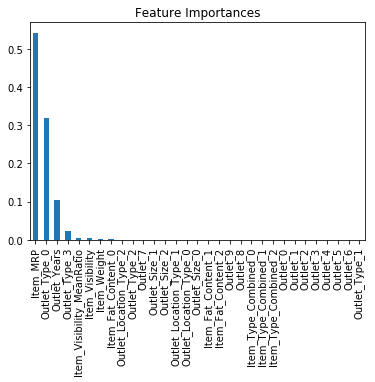

In [54]:
from sklearn.tree import DecisionTreeRegressor

predictors = [x for x in train.columns if x not in [target]+IDcol]

DTR = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

modelfit(DTR,"DecisionTreeRegressor", train, test, predictors, target, IDcol, 'DT.csv')
cross_val(DTR, train, test, predictors, target)

coef3 = pd.Series(DTR.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')


************** Regression Model Report **************

R Square                 : 0.6075
Adj R Square             : 0.6072

Mean Absolute Error     : 748.9
Mean Squared Error      : 1.143e+06
Root Mean Squared Error : 1069.01623323


/home/mkadam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


***********************************************

Model Cross Validation Report
RMSE : 1069
CV Score : Mean - 1098 | Std - 20.94 | Min - 1068 | Max - 1131
***********************************************


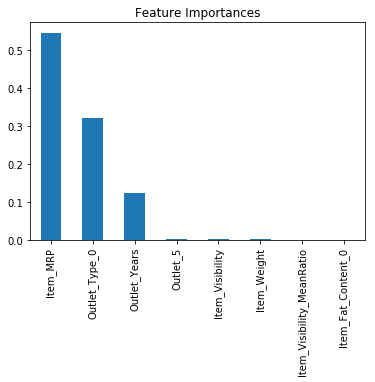

In [56]:
from sklearn.tree import DecisionTreeRegressor

predictors = ['Item_MRP','Outlet_Type_0','Outlet_Years','Item_Visibility_MeanRatio','Item_Visibility','Outlet_5','Item_Weight','Item_Fat_Content_0']

DTR1 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)

modelfit(DTR1,"DecisionTreeRegressor", train, test, predictors, target, IDcol, 'DT1.csv')
cross_val(DTR1, train, test, predictors, target)

coef3 = pd.Series(DTR1.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')


************** Regression Model Report **************

R Square                 : 0.6121
Adj R Square             : 0.6119

Mean Absolute Error     : 745.4
Mean Squared Error      : 1.129e+06
Root Mean Squared Error : 1062.77099048


/home/mkadam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


***********************************************

Model Cross Validation Report
RMSE : 1063
CV Score : Mean - 1092 | Std - 20.06 | Min - 1067 | Max - 1124
***********************************************


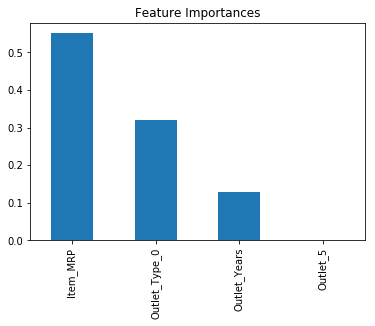

In [57]:
from sklearn.tree import DecisionTreeRegressor

predictors = ['Item_MRP','Outlet_Type_0','Outlet_5','Outlet_Years']

DTR2 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

modelfit(DTR2,"DecisionTreeRegressor", train, test, predictors, target, IDcol, 'DT2.csv')
cross_val(DTR2, train, test, predictors, target)

coef3 = pd.Series(DTR2.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')


************** Regression Model Report **************

R Square                 : 0.6048
Adj R Square             : 0.6034

Mean Absolute Error     : 752.6
Mean Squared Error      : 1.151e+06
Root Mean Squared Error : 1072.66577698


/home/mkadam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


***********************************************

Model Cross Validation Report
RMSE : 1073
CV Score : Mean - 1085 | Std - 20.34 | Min - 1049 | Max - 1114
***********************************************


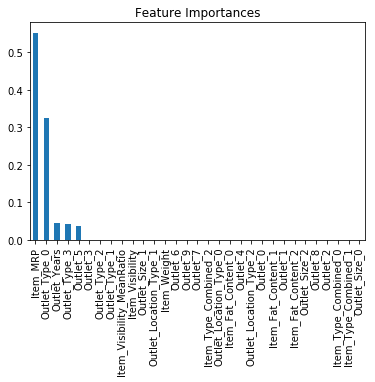

In [58]:
from sklearn.ensemble import RandomForestRegressor

predictors = [x for x in train.columns if x not in [target]+IDcol]

RFR = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)

modelfit(RFR,"RandomForestRegressor", train, test, predictors, target, IDcol, 'RF3.csv')
cross_val(RFR, train, test, predictors, target)

coef5 = pd.Series(RFR.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')


************** Regression Model Report **************

R Square                 : 0.541
Adj R Square             : 0.5407

Mean Absolute Error     : 815.8
Mean Squared Error      : 1.336e+06
Root Mean Squared Error : 1156.03155530


/home/mkadam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


***********************************************

Model Cross Validation Report
RMSE : 1161
CV Score : Mean - 1161 | Std - 32.6 | Min - 1106 | Max - 1226
***********************************************


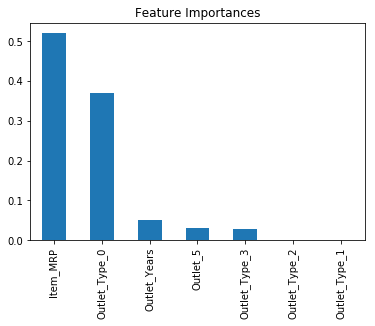

In [59]:
from sklearn.ensemble import RandomForestRegressor

#predictors = [x for x in train.columns if x not in [target]+IDcol]
predictors = ['Item_MRP','Outlet_Type_0','Outlet_Years','Outlet_Type_3','Outlet_5','Outlet_Type_1','Outlet_Type_2']

RFR2 = RandomForestRegressor(n_estimators=100,max_depth=3, min_samples_leaf=100,n_jobs=4)

modelfit(RFR2,"RandomForestRegressor", train, test, predictors, target, IDcol, 'RF2.csv')
cross_val(RFR2, train, test, predictors, target)

coef5 = pd.Series(RFR2.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')


************** Regression Model Report **************

R Square                 : 0.6579
Adj R Square             : 0.6567

Mean Absolute Error     : 707.5
Mean Squared Error      : 9.961e+05
Root Mean Squared Error : 998.04879162


/home/mkadam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


***********************************************

Model Cross Validation Report
RMSE : 998
CV Score : Mean - 1095 | Std - 20.75 | Min - 1063 | Max - 1125
***********************************************


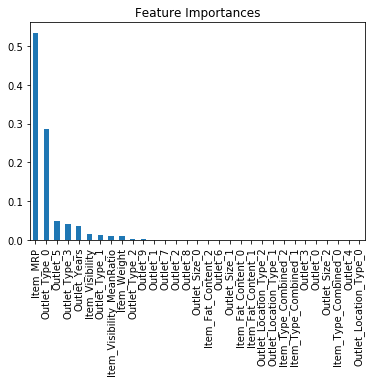

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

predictors = [x for x in train.columns if x not in [target]+IDcol]
#predictors = ['Item_MRP','Outlet_Type_0','Outlet_Years','Outlet_5','Outlet_Type_3']


GBM = GradientBoostingRegressor(n_estimators=200) #, learning_rate=1.0, max_depth=1)
#RFR2 = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)

modelfit(GBM,"RandomForestRegressor", train, test, predictors, target, IDcol, 'GBMR1.csv')
cross_val(GBM, train, test, predictors, target)

coef5 = pd.Series(GBM.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')



************** Regression Model Report **************

R Square                 : 0.5651
Adj R Square             : 0.5635

Mean Absolute Error     : 825
Mean Squared Error      : 1.266e+06
Root Mean Squared Error : 1125.33428109


/home/mkadam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


***********************************************

Model Cross Validation Report
RMSE : 1125
CV Score : Mean - 1138 | Std - 19.94 | Min - 1108 | Max - 1176
***********************************************


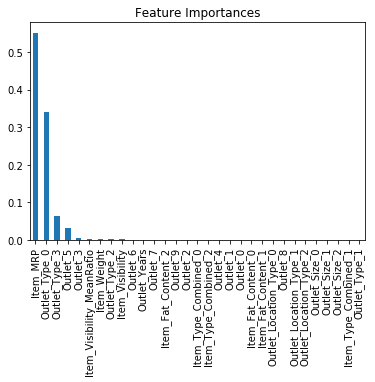

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

predictors = [x for x in train.columns if x not in [target]+IDcol]

GBM = GradientBoostingRegressor(loss='huber',n_estimators=400, learning_rate=0.25, max_depth=1)
#RFR2 = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)ls,lad,huber
modelfit(GBM,"RandomForestRegressor", train, test, predictors, target, IDcol, 'GBM2.csv')
cross_val(GBM, train, test, predictors, target)

coef5 = pd.Series(GBM.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')

In [62]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor


************** Regression Model Report **************

R Square                 : 0.5611
Adj R Square             : 0.5595

Mean Absolute Error     : 854.5
Mean Squared Error      : 1.278e+06
Root Mean Squared Error : 1130.49109705


/home/mkadam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


***********************************************

Model Cross Validation Report
RMSE : 1123
CV Score : Mean - 1139 | Std - 25.38 | Min - 1107 | Max - 1179
***********************************************


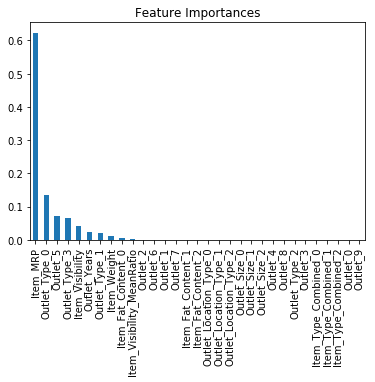

In [63]:
predictors = [x for x in train.columns if x not in [target]+IDcol]

AB = AdaBoostRegressor(n_estimators=100, learning_rate=0.1,)
#RFR2 = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)ls,lad,huber
modelfit(AB,"RandomForestRegressor", train, test, predictors, target, IDcol, 'AB.csv')
cross_val(AB, train, test, predictors, target)

coef5 = pd.Series(AB.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')

### Checking SVR

In [64]:
from sklearn.svm import SVR

predictors = [x for x in train.columns if x not in [target]+IDcol]

# print predictors
svr_model = SVR(kernel='linear') 

modelfit(svr_model,"SVRegressor", train, test, predictors, target, IDcol, 'alg1.csv')

#coef1 = pd.Series(model2.coef_, predictors).sort_values()
#coef1.plot(kind='bar', title='Model Coefficients')


************** Regression Model Report **************

R Square                 : 0.5118
Adj R Square             : 0.51

Mean Absolute Error     : 854.4
Mean Squared Error      : 1.422e+06
Root Mean Squared Error : 1192.32650121


/home/mkadam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Checking KNN regressor

In [65]:
from sklearn.neighbors import KNeighborsRegressor

predictors = [x for x in train.columns if x not in [target]+IDcol]

# print predictors
knn_reg_model = KNeighborsRegressor(n_neighbors=10) 

modelfit(knn_reg_model,"KNNRegressor", train, test, predictors, target, IDcol, 'alg1.csv')

#coef1 = pd.Series(model2.coef_, predictors).sort_values()
#coef1.plot(kind='bar', title='Model Coefficients')


************** Regression Model Report **************

R Square                 : 0.5564
Adj R Square             : 0.5548

Mean Absolute Error     : 829.9
Mean Squared Error      : 1.292e+06
Root Mean Squared Error : 1136.54620431


/home/mkadam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Checking XGBoost

In [66]:
from xgboost import XGBRegressor

In [67]:
xgb_reg = XGBRegressor()

In [68]:
#Fit the algorithm on the data
xgb_reg.fit(train[predictors], train[target])
        
#Predict training set:
train_predictions = xgb_reg.predict(train[predictors])
    
#Perform Evaluation:
r2 = xgb_reg.score(train[predictors],train[target])
n = train[predictors].shape[0]
p = train[predictors].shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1) 
    
print ("\n************** Regression Model Report **************")
print("\nR Square                 : %.4g" % r2)
print("Adj R Square             : %.4g" %adjusted_r2)
print ("\nMean Absolute Error     : %.4g" % metrics.mean_absolute_error(train[target].values, train_predictions))
print ("Mean Squared Error      : %.4g" % metrics.mean_squared_error(train[target].values, train_predictions))
print ("Root Mean Squared Error : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values, train_predictions)))

/home/mkadam/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mkadam/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[21:27:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

************** Regression Model Report **************

R Square                 : 0.6337
Adj R Square             : 0.6324

Mean Absolute Error     : 727.7
Mean Squared Error      : 1.067e+06
Root Mean Squared Error : 1033


In [69]:
reg_summary = pd.DataFrame(data=predictors,columns=['Features'])
reg_summary['Feature Importance'] = xgb_reg.feature_importances_
p_values = f_regression(train[predictors], train[target])[1]
reg_summary['F-stat(p-value)'] = p_values
temp = []
p = p_values.round(3)
for i in p:
    if i < 0.05:
        temp ="Yes"   
    else:
        temp ="No"
        reg_summary['Significant'] = temp
        
print ("\n************** Summary Report **************")
print(reg_summary)


************** Summary Report **************
                     Features  Feature Importance  F-stat(p-value) Significant
0                    Item_MRP            0.124799     0.000000e+00          No
1             Item_Visibility            0.006008     1.095740e-32          No
2                 Item_Weight            0.005127     2.208946e-01          No
3   Item_Visibility_MeanRatio            0.004864    2.923721e-254          No
4                Outlet_Years            0.204131     5.673082e-06          No
5          Item_Fat_Content_0            0.009232     3.836488e-01          No
6          Item_Fat_Content_1            0.007960     3.160487e-01          No
7          Item_Fat_Content_2            0.004303     8.398917e-02          No
8      Outlet_Location_Type_0            0.000000     6.720375e-25          No
9      Outlet_Location_Type_1            0.003252     7.346768e-08          No
10     Outlet_Location_Type_2            0.009164     1.842817e-05          No
11    